In [14]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import joblib 
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
df = pd.read_csv('cardio_data_processed.csv')
df.drop(columns='age_years', inplace=True)
df.drop(columns='bmi', inplace=True)
df.drop(columns='cardio', inplace=True)
df.drop(columns='id', inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bp_category,bp_category_encoded
0,18393,2,168,62.0,110,80,1,1,0,0,1,Hypertension Stage 1,Hypertension Stage 1
1,20228,1,156,85.0,140,90,3,1,0,0,1,Hypertension Stage 2,Hypertension Stage 2
2,18857,1,165,64.0,130,70,3,1,0,0,0,Hypertension Stage 1,Hypertension Stage 1
3,17623,2,169,82.0,150,100,1,1,0,0,1,Hypertension Stage 2,Hypertension Stage 2
4,17474,1,156,56.0,100,60,1,1,0,0,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,19240,2,168,76.0,120,80,1,1,1,0,1,Hypertension Stage 1,Hypertension Stage 1
68201,22601,1,158,126.0,140,90,2,2,0,0,1,Hypertension Stage 2,Hypertension Stage 2
68202,19066,2,183,105.0,180,90,3,1,0,1,0,Hypertension Stage 2,Hypertension Stage 2
68203,22431,1,163,72.0,135,80,1,2,0,0,0,Hypertension Stage 1,Hypertension Stage 1


In [15]:
# Select the features to normalize
features_to_normalize = ['age','gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Extract the feature columns from the dataframe
X = df[features_to_normalize]


In [16]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame for better readability
X_normalized_df = pd.DataFrame(X_normalized, columns=features_to_normalize)

# Show the normalized data
print(X_normalized_df)


            age  gender    height    weight     ap_hi     ap_lo  cholesterol  \
0      0.588076     1.0  0.579487  0.269841  0.222222  0.333333          0.0   
1      0.730159     0.0  0.517949  0.391534  0.555556  0.500000          1.0   
2      0.624003     0.0  0.564103  0.280423  0.444444  0.166667          1.0   
3      0.528455     1.0  0.584615  0.375661  0.666667  0.666667          0.0   
4      0.516918     0.0  0.517949  0.238095  0.111111  0.000000          0.0   
...         ...     ...       ...       ...       ...       ...          ...   
68200  0.653659     1.0  0.579487  0.343915  0.333333  0.333333          0.0   
68201  0.913899     0.0  0.528205  0.608466  0.555556  0.500000          0.5   
68202  0.640186     1.0  0.656410  0.497354  1.000000  0.500000          1.0   
68203  0.900736     0.0  0.553846  0.322751  0.500000  0.333333          0.0   
68204  0.754317     0.0  0.589744  0.322751  0.333333  0.333333          0.5   

       gluc  smoke  alco  active  
0   

In [17]:
df['bp_category'].unique()

array(['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal',
       'Elevated'], dtype=object)

In [18]:
# Extract the min and scale values from the scaler
scaler_params = {
    'min': scaler.data_min_.tolist(),   # The minimum values for each feature
    'scale': scaler.data_range_.tolist() # The scaling factors for each feature
}

# Save the parameters as a JSON file
import json

with open('minmax_scaler_params.json', 'w') as json_file:
    json.dump(scaler_params, json_file)

print(scaler_params)


{'min': [10798.0, 1.0, 55.0, 11.0, 90.0, 60.0, 1.0, 1.0, 0.0, 0.0, 0.0], 'scale': [12915.0, 1.0, 195.0, 189.0, 90.0, 60.0, 2.0, 2.0, 1.0, 1.0, 1.0]}


In [19]:
# Step 1: Create a mapping dictionary for bp_category
bp_category_mapping = {label: idx for idx, label in enumerate(df['bp_category'].unique())}

# Step 2: Encode the 'bp_category' column using the mapping
df['bp_category_encoded'] = df['bp_category'].map(bp_category_mapping)

# Show the encoded dataframe
print(df)

# Step 3: Save the mapping as a JSON file
with open('bp_category_mapping.json', 'w') as json_file:
    json.dump(bp_category_mapping, json_file)

# Optionally, save the dataframe with the encoded column if needed
df.to_csv('encoded_data.csv', index=False)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
68200  19240       2     168    76.0    120     80            1     1      1   
68201  22601       1     158   126.0    140     90            2     2      0   
68202  19066       2     183   105.0    180     90            3     1      0   
68203  22431       1     163    72.0    135     80            1     2      0   
68204  20540       1     170    72.0    120     80            2     1      0   

       alco  active           bp_catego

In [20]:
X_normalized_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,1.0,0.579487,0.269841,0.222222,0.333333,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.391534,0.555556,0.500000,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.280423,0.444444,0.166667,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.375661,0.666667,0.666667,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.238095,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
68200,0.653659,1.0,0.579487,0.343915,0.333333,0.333333,0.0,0.0,1.0,0.0,1.0
68201,0.913899,0.0,0.528205,0.608466,0.555556,0.500000,0.5,0.5,0.0,0.0,1.0
68202,0.640186,1.0,0.656410,0.497354,1.000000,0.500000,1.0,0.0,0.0,1.0,0.0
68203,0.900736,0.0,0.553846,0.322751,0.500000,0.333333,0.0,0.5,0.0,0.0,0.0


In [22]:

# Now, combine the normalized data with the original dataframe
# Drop the original columns that are being normalized
df_combined = df.drop(columns=features_to_normalize)

# Concatenate the normalized dataframe with the original dataframe (excluding normalized columns)
df_combined = pd.concat([df_combined, X_normalized_df], axis=1)
df_combined.drop(columns='bp_category', inplace=True)

df_combined

,bp_category_encoded,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,0.588076,1.0,0.579487,0.269841,0.222222,0.333333,0.0,0.0,0.0,0.0,1.0
1,1,0.730159,0.0,0.517949,0.391534,0.555556,0.500000,1.0,0.0,0.0,0.0,1.0
2,0,0.624003,0.0,0.564103,0.280423,0.444444,0.166667,1.0,0.0,0.0,0.0,0.0
3,1,0.528455,1.0,0.584615,0.375661,0.666667,0.666667,0.0,0.0,0.0,0.0,1.0
4,2,0.516918,0.0,0.517949,0.238095,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68200,0,0.653659,1.0,0.579487,0.343915,0.333333,0.333333,0.0,0.0,1.0,0.0,1.0
68201,1,0.913899,0.0,0.528205,0.608466,0.555556,0.500000,0.5,0.5,0.0,0.0,1.0
68202,1,0.640186,1.0,0.656410,0.497354,1.000000,0.500000,1.0,0.0,0.0,1.0,0.0
68203,0,0.900736,0.0,0.553846,0.322751,0.500000,0.333333,0.0,0.5,0.0,0.0,0.0


In [23]:
from sklearn.model_selection import train_test_split

# Assuming your combined dataframe is called df_combined
# Let's define the features and the target
X = df_combined.drop(columns=['bp_category_encoded'])  # Drop the target columns
y = df_combined['bp_category_encoded']  # Assuming this is your target column

# First split: 80% training, 20% temporary (for validation and testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% testing (from the temporary set)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have:
# - X_train, y_train: Training set (80% of the original data)
# - X_val, y_val: Validation set (10% of the original data)
# - X_test, y_test: Test set (10% of the original data)

# You can verify the sizes of each split:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 54564
Validation set size: 6820
Test set size: 6821


In [24]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
30732,0.876345,0.0,0.574359,0.306878,0.222222,0.166667,0.0,0.0,0.0,0.0,1.0
11861,0.290205,0.0,0.456410,0.338624,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0
58611,0.692218,0.0,0.502564,0.296296,0.444444,0.333333,0.0,0.0,0.0,0.0,1.0
9441,0.397755,0.0,0.605128,0.312169,0.333333,0.166667,0.0,0.0,0.0,0.0,1.0
65348,0.803871,0.0,0.441026,0.195767,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
37194,0.673171,0.0,0.512821,0.291005,0.555556,0.333333,0.0,0.0,0.0,0.0,1.0
6265,0.335579,0.0,0.579487,0.444444,0.444444,0.333333,0.0,0.5,0.0,0.0,1.0
54886,0.914673,0.0,0.523077,0.338624,0.444444,0.333333,0.0,0.0,0.0,0.0,1.0
860,0.959504,1.0,0.579487,0.365079,0.777778,0.500000,0.0,0.0,0.0,0.0,1.0


In [25]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)

X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [26]:

# Convert DataFrames to NumPy arrays and then to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # For classification, target must be long (int)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# Create TensorDataset which pairs the inputs and outputs (features and labels)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create DataLoader for batching and shuffling the training set
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create DataLoader for the validation set (no need for shuffling during evaluation)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)





In [27]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]  # Number of features
output_size = len(y.unique())  # Number of unique classes
print(output_size)
print(input_size)

4
11


In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [29]:
import os
model_save_dir = 'model'
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)


In [30]:


# Define the model
model = nn.Sequential(
    nn.Linear(input_size, 128),                                                                     
    nn.ReLU(),
    nn.Dropout(0.05),  # Lower dropout
    nn.Linear(128, 64),
    nn.ReLU(),         # Consistent activation
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Dropout(0.05),
    nn.Linear(16, output_size)  # No Softmax here
)


# Initialize weights
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)  # Xavier initialization
        if m.bias is not None:
            nn.init.zeros_(m.bias)

model.apply(initialize_weights)
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Higher learning rate
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training step
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Validation step
    model.eval()
    correct, total, val_loss = 0, 0, 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Adjust learning rate based on validation loss
    scheduler.step(val_loss)

    # Save the model checkpoint every 10 epochs
    if (epoch + 1) % 10 == 0:
        torch.save(model.state_dict(), f'{model_save_dir}/model_{epoch+1}.pt')

# Save the final trained model
torch.save(model.state_dict(), f'{model_save_dir}/final_model.pt')


Epoch [1/200], Loss: 0.4156
Validation Loss: 0.2566, Validation Accuracy: 91.39%
Epoch [2/200], Loss: 0.2131
Validation Loss: 0.0984, Validation Accuracy: 97.55%
Epoch [3/200], Loss: 0.0934
Validation Loss: 0.0564, Validation Accuracy: 98.78%
Epoch [4/200], Loss: 0.0653
Validation Loss: 0.0375, Validation Accuracy: 99.08%
Epoch [5/200], Loss: 0.0564
Validation Loss: 0.0296, Validation Accuracy: 99.33%
Epoch [6/200], Loss: 0.0503
Validation Loss: 0.0403, Validation Accuracy: 99.15%
Epoch [7/200], Loss: 0.0471
Validation Loss: 0.0269, Validation Accuracy: 99.40%
Epoch [8/200], Loss: 0.0436
Validation Loss: 0.0278, Validation Accuracy: 99.37%
Epoch [9/200], Loss: 0.0432
Validation Loss: 0.0370, Validation Accuracy: 99.03%
Epoch [10/200], Loss: 0.0397
Validation Loss: 0.0236, Validation Accuracy: 99.44%
Epoch [11/200], Loss: 0.0374
Validation Loss: 0.0442, Validation Accuracy: 99.25%
Epoch [12/200], Loss: 0.0359
Validation Loss: 0.0283, Validation Accuracy: 99.18%
Epoch [13/200], Loss: 0.0

In [31]:
# Calculate the total number of parameters
total_params = sum(p.numel() for p in model.parameters())

In [32]:
total_params 


10900

C:\Users\rifat\AppData\Local\Temp\ipykernel_20520\3574674988.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{model_save_dir}/final_m


Classification Report:


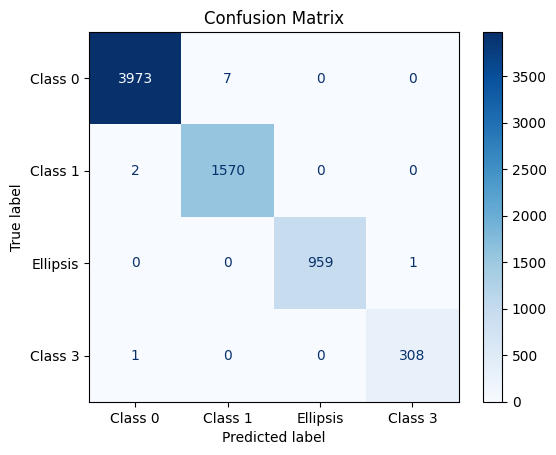

Test Accuracy: 99.84%

Per-Class Metrics:
Class 0 - Precision: 0.9992, Recall: 0.9982, F1-Score: 0.9987
Class 1 - Precision: 0.9956, Recall: 0.9987, F1-Score: 0.9971
Class 2 - Precision: 1.0000, Recall: 0.9990, F1-Score: 0.9995
Class 3 - Precision: 0.9968, Recall: 0.9968, F1-Score: 0.9968
Multi-Class ROC-AUC (OVR): 1.0000


In [33]:
import os
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the model (same architecture as trained)
model = nn.Sequential(
    nn.Linear(input_size, 128),
    nn.ReLU(),
    nn.Dropout(0.05),  # Lower dropout
    nn.Linear(128, 64),
    nn.ReLU(),         # Consistent activation
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Dropout(0.05),
    nn.Linear(16, output_size)  # No Softmax here
)

# Load the trained model weights
model.load_state_dict(torch.load(f'{model_save_dir}/final_model.pt'))
model.eval()  # Set model to evaluation mode
model.to(device)

# Test data preparation
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize variables to store results
y_true = []
y_pred = []
y_probs = []  # To store probabilities for metrics like ROC-AUC

# Evaluate the model on the test set
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Get model predictions
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Predicted labels
        probabilities = torch.softmax(outputs, dim=1)  # Probabilities for each class

        # Append results to lists
        y_true.extend(labels.cpu().numpy())  # Ground truth
        y_pred.extend(predicted.cpu().numpy())  # Predicted labels
        y_probs.extend(probabilities.cpu().numpy())  # Class probabilities

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)  # Probabilities for each class

# **1. Classification Report**
print("\nClassification Report:")

# **2. Confusion Matrix**
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", ..., f"Class {output_size-1}"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **3. Accuracy**
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# **4. Precision, Recall, and F1-Score**
precision = cm.diagonal() / cm.sum(axis=0)
recall = cm.diagonal() / cm.sum(axis=1)
f1_scores = 2 * (precision * recall) / (precision + recall)

print("\nPer-Class Metrics:")
for i, (p, r, f1) in enumerate(zip(precision, recall, f1_scores)):
    print(f"Class {i} - Precision: {p:.4f}, Recall: {r:.4f}, F1-Score: {f1:.4f}")

# **5. ROC-AUC (for multi-class)**
if output_size == 2:
    # For binary classification
    roc_auc = roc_auc_score(y_true, y_probs[:, 1])
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    # For multi-class ROC-AUC (one-vs-rest approach)
    roc_auc_ovr = roc_auc_score(y_true, y_probs, multi_class='ovr')
    print(f"Multi-Class ROC-AUC (OVR): {roc_auc_ovr:.4f}")

# **6. Log Predictions (optional for debugging)**
# Save the predictions for analysis
np.savetxt("predictions.csv", np.column_stack((y_true, y_pred)), fmt='%d', delimiter=',', header='True,Predicted')



In [75]:
!pip install onnxruntime


   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.3 MB 16.7 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.3 MB 17.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.3 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 16.1 MB/s eta 0:00:00


In [36]:
input_size

11

In [34]:
import torch
import torch.onnx
import os
from torch import nn

# Load the trained model
model = nn.Sequential(
    nn.Linear(input_size, 128),
    nn.ReLU(),
    nn.Dropout(0.05),  # Lower dropout
    nn.Linear(128, 64),
    nn.ReLU(),         # Consistent activation
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Dropout(0.05),
    nn.Linear(16, output_size)  # No Softmax here
)

# Load weights from the trained model
model.load_state_dict(torch.load(f'{model_save_dir}/final_model.pt'))
model.eval()  # Set the model to evaluation mode

# Specify a dummy input with the correct shape (e.g., input_size features)
dummy_input = torch.randn(1, input_size)  # Batch size 1, with input_size features

# Path to save the ONNX model
onnx_model_path = 'final_model.onnx'

# Export the model
torch.onnx.export(model, dummy_input, onnx_model_path, export_params=True, opset_version=12,
                  do_constant_folding=True, input_names=['input'], output_names=['output'])

print(f"Model has been exported to {onnx_model_path}")


Model has been exported to final_model.onnx


C:\Users\rifat\AppData\Local\Temp\ipykernel_20520\3521035723.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{model_save_dir}/final_m

Input name: input, Output name: output

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3980
     Class 1       1.00      1.00      1.00      1572
     Class 2       1.00      1.00      1.00       960
     Class 3       1.00      1.00      1.00       309

    accuracy                           1.00      6821
   macro avg       1.00      1.00      1.00      6821
weighted avg       1.00      1.00      1.00      6821



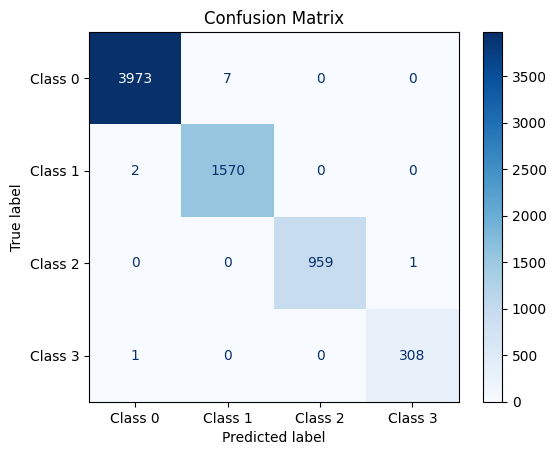

Test Accuracy: 99.84%

Per-Class Metrics:
Class 0 - Precision: 0.9992, Recall: 0.9982, F1-Score: 0.9987
Class 1 - Precision: 0.9956, Recall: 0.9987, F1-Score: 0.9971
Class 2 - Precision: 1.0000, Recall: 0.9990, F1-Score: 0.9995
Class 3 - Precision: 0.9968, Recall: 0.9968, F1-Score: 0.9968


ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

In [35]:
import onnxruntime as ort
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Set the number of classes (output size)
output_size = 4  # Number of output classes (adjust this based on your model's output)

# Define the class labels (adjust based on your dataset)
class_labels = [f"Class {i}" for i in range(output_size)]

# Load the ONNX model
onnx_model_path = 'final_model.onnx'
session = ort.InferenceSession(onnx_model_path)

# Get the input and output names from the ONNX model
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
print(f"Input name: {input_name}, Output name: {output_name}")

# Prepare the test data (assuming `X_test` and `y_test` are pandas DataFrames or numpy arrays)
X_test_tensor = X_test.values.astype(np.float32)  # Convert to numpy array if it's a pandas DataFrame
y_test_tensor = y_test.values  # Actual labels for the test set

# Initialize variables to store results
y_true = []
y_pred = []
y_probs = []  # To store probabilities for metrics like ROC-AUC

# Evaluate the model on the test set using ONNX Runtime
batch_size = 1 # You can adjust the batch size here
for i in range(0, len(X_test_tensor), batch_size):  # Iterate through batches
    batch_input = X_test_tensor[i:i+batch_size]
    batch_labels = y_test_tensor[i:i+batch_size]
    
    # Run inference on the batch
    outputs = session.run([output_name], {input_name: batch_input})
    
    # Get the predicted labels (class with max probability)
    predicted = np.argmax(outputs[0], axis=1)  # Get the class with the max probability
    probabilities = outputs[0]  # Raw probabilities for each class
    
    # Append results to lists
    y_true.extend(batch_labels)
    y_pred.extend(predicted)
    y_probs.extend(probabilities)

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)  # Probabilities for each class

# **1. Classification Report**
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# **2. Confusion Matrix**
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **3. Accuracy**
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# **4. Precision, Recall, and F1-Score**
precision = cm.diagonal() / cm.sum(axis=0)
recall = cm.diagonal() / cm.sum(axis=1)
f1_scores = 2 * (precision * recall) / (precision + recall)

print("\nPer-Class Metrics:")
for i, (p, r, f1) in enumerate(zip(precision, recall, f1_scores)):
    print(f"Class {i} - Precision: {p:.4f}, Recall: {r:.4f}, F1-Score: {f1:.4f}")

# **5. ROC-AUC (for multi-class)**
if output_size == 2:
    # For binary classification
    roc_auc = roc_auc_score(y_true, y_probs[:, 1])
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    # For multi-class ROC-AUC (one-vs-rest approach)
    roc_auc_ovr = roc_auc_score(y_true, y_probs, multi_class='ovr')
    print(f"Multi-Class ROC-AUC (OVR): {roc_auc_ovr:.4f}")

# **6. Log Predictions (optional for debugging)**
np.savetxt("predictions.csv", np.column_stack((y_true, y_pred)), fmt='%d', delimiter=',', header='True,Predicted')


Input name: input, Output name: output

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3980
     Class 1       1.00      1.00      1.00      1572
     Class 2       1.00      1.00      1.00       960
     Class 3       0.99      1.00      1.00       309

    accuracy                           1.00      6821
   macro avg       1.00      1.00      1.00      6821
weighted avg       1.00      1.00      1.00      6821



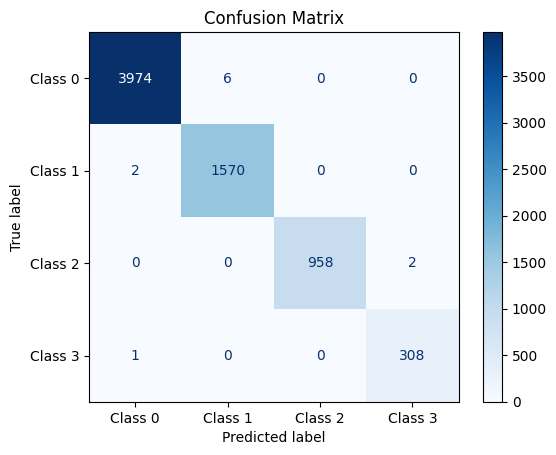

Test Accuracy: 99.84%

Per-Class Metrics:
Class 0 - Precision: 0.9992, Recall: 0.9985, F1-Score: 0.9989
Class 1 - Precision: 0.9962, Recall: 0.9987, F1-Score: 0.9975
Class 2 - Precision: 1.0000, Recall: 0.9979, F1-Score: 0.9990
Class 3 - Precision: 0.9935, Recall: 0.9968, F1-Score: 0.9952


ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

In [27]:
import onnxruntime as ort
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Set the number of classes (output size)
output_size = 4  # Number of output classes (adjust this based on your model's output)

# Define the class labels (adjust based on your dataset)
class_labels = [f"Class {i}" for i in range(output_size)]

# Load the ONNX model
onnx_model_path = 'final_model.onnx'
session = ort.InferenceSession(onnx_model_path)

# Get the input and output names from the ONNX model
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
print(f"Input name: {input_name}, Output name: {output_name}")

# Prepare the test data (assuming `X_test` and `y_test` are pandas DataFrames or numpy arrays)
X_test_tensor = X_test.values.astype(np.float32)  # Convert to numpy array if it's a pandas DataFrame
y_test_tensor = y_test.values  # Actual labels for the test set

# Initialize variables to store results
y_true = []
y_pred = []
y_probs = []  # To store probabilities for metrics like ROC-AUC

# Evaluate the model on the test set using ONNX Runtime
batch_size = 1 # You can adjust the batch size here
for i in range(0, len(X_test_tensor), batch_size):  # Iterate through batches
    batch_input = X_test_tensor[i:i+batch_size]
    batch_labels = y_test_tensor[i:i+batch_size]
    
    # Run inference on the batch
    outputs = session.run([output_name], {input_name: batch_input})
    
    # Get the predicted labels (class with max probability)
    predicted = np.argmax(outputs[0], axis=1)  # Get the class with the max probability
    probabilities = outputs[0]  # Raw probabilities for each class
    
    # Append results to lists
    y_true.extend(batch_labels)
    y_pred.extend(predicted)
    y_probs.extend(probabilities)

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)  # Probabilities for each class

# **1. Classification Report**
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# **2. Confusion Matrix**
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **3. Accuracy**
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# **4. Precision, Recall, and F1-Score**
precision = cm.diagonal() / cm.sum(axis=0)
recall = cm.diagonal() / cm.sum(axis=1)
f1_scores = 2 * (precision * recall) / (precision + recall)

print("\nPer-Class Metrics:")
for i, (p, r, f1) in enumerate(zip(precision, recall, f1_scores)):
    print(f"Class {i} - Precision: {p:.4f}, Recall: {r:.4f}, F1-Score: {f1:.4f}")

# **5. ROC-AUC (for multi-class)**
if output_size == 2:
    # For binary classification
    roc_auc = roc_auc_score(y_true, y_probs[:, 1])
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    # For multi-class ROC-AUC (one-vs-rest approach)
    roc_auc_ovr = roc_auc_score(y_true, y_probs, multi_class='ovr', average='macro')
    print(f"Multi-Class ROC-AUC (OVR): {roc_auc_ovr:.4f}")

    # Optional: If you want to plot ROC curves for each class (one-vs-rest)
    for i in range(output_size):
        fpr, tpr, thresholds = roc_curve(y_true == i, y_probs[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_true == i, y_probs[:, i]):.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# **6. Log Predictions (optional for debugging)**
np.savetxt("predictions.csv", np.column_stack((y_true, y_pred)), fmt='%d', delimiter=',', header='True,Predicted')


In [ ]:
import onnxruntime as ort
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Load the ONNX model
onnx_model_path = 'final_model.onnx'
session = ort.InferenceSession(onnx_model_path)

# Get the input and output names from the ONNX model
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
print(f"Input name: {input_name}, Output name: {output_name}")

# Prepare the test data (use the same test data you used for PyTorch)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).cpu().numpy()
y_test_tensor = y_test.values

# Initialize variables to store results
y_true = []
y_pred = []
y_probs = []

# Evaluate the model on the test set using ONNX Runtime
for i in range(0, len(X_test_tensor), 64):  # Assuming batch size of 64
    batch_input = X_test_tensor[i:i+64]
    batch_labels = y_test_tensor[i:i+64]
    
    # Run inference on the batch
    outputs = session.run([output_name], {input_name: batch_input.astype(np.float32)})
    
    # Get the predictions (class with max probability)
    predicted = np.argmax(outputs[0], axis=1)
    probabilities = outputs[0]  # Raw probabilities for each class
    
    # Append results to lists
    y_true.extend(batch_labels)
    y_pred.extend(predicted)
    y_probs.extend(probabilities)

# Convert results to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)

# **1. Classification Report**
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1", ..., f"Class {output_size-1}"]))

# **2. Confusion Matrix**
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", ..., f"Class {output_size-1}"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **3. Accuracy**
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# **4. Precision, Recall, and F1-Score**
precision = cm.diagonal() / cm.sum(axis=0)
recall = cm.diagonal() / cm.sum(axis=1)
f1_scores = 2 * (precision * recall) / (precision + recall)

print("\nPer-Class Metrics:")
for i, (p, r, f1) in enumerate(zip(precision, recall, f1_scores)):
    print(f"Class {i} - Precision: {p:.4f}, Recall: {r:.4f}, F1-Score: {f1:.4f}")

# **5. ROC-AUC (for multi-class)**
if output_size == 2:
    # For binary classification
    roc_auc = roc_auc_score(y_true, y_probs[:, 1])
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    # For multi-class ROC-AUC (one-vs-rest approach)
    roc_auc_ovr = roc_auc_score(y_true, y_probs, multi_class='ovr')
    print(f"Multi-Class ROC-AUC (OVR): {roc_auc_ovr:.4f}")

# **6. Log Predictions (optional for debugging)**
np.savetxt("predictions.csv", np.column_stack((y_true, y_pred)), fmt='%d', delimiter=',', header='True,Predicted')
